<a href="https://colab.research.google.com/github/arunravi8595/CE888/blob/main/Lab_8/Transfer_learning_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import os
os.environ['KAGGLE_USERNAME'] = "arunravi8595" # username from the json file
os.environ['KAGGLE_KEY'] = "34a1ea24ea27eeb59b56aeef9e1344fd" # key from the json file
!kaggle datasets download -d CE888-Lab8-data
 # api copied from kaggle (https://www.kaggle.com/arunravi8595/ce888-lab8-data)

CE888-Lab8-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [99]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/CE888-Lab8-data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [100]:
data_dir_list = os.listdir('/content/data')
path, dirs, files = next(os.walk("/content/data"))
file_count = len(files)
print(file_count)

0


In [102]:
# Make new base directory
original_dataset_dir = '/content/data'
base_dir = '/content/lab8'
os.mkdir(base_dir)

In [103]:
data_dir_list = os.listdir('/content/data')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/data"))

['cats', 'Humans', 'dogs', 'horses']


In [104]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
'''
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

    '''

In [105]:
categories = {}
for i in dirs:
  categories[i] = dirs.index(i)

print(categories)

{'cats': 0, 'Humans': 1, 'dogs': 2, 'horses': 3}


In [106]:
import cv2
import numpy as np
from random import shuffle
from tensorflow.keras.utils import to_categorical


IMG_SIZE = 224
LR = 1e-4

In [107]:

from google.colab.patches import cv2_imshow

images= []       
y = []     
for dir in dirs:
    for dirname, _, filenames in os.walk(path+'/'+dir):
        for filename in filenames:
            file_path = str(path+'/'+dir+'/'+filename)
            image = cv2.resize(cv2.imread(file_path), (224, 224))
            image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
            images.append(np.array(image))
            y.append(categories[str(dir)])
images = np.array(images)
y =np.array(to_categorical(y,num_classes=4))

In [108]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'dog': return 1
    elif word_label == 'cat': return 0

In [109]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [111]:
'''
train_x, train_y = createDataSplitSet(train_dir)
val_x, val_y = createDataSplitSet(validation_dir)
test_x, test_y = createDataSplitSet(test_dir)
'''

'\ntrain_x, train_y = createDataSplitSet(train_dir)\nval_x, val_y = createDataSplitSet(validation_dir)\ntest_x, test_y = createDataSplitSet(test_dir)\n'

In [112]:
from sklearn.model_selection import train_test_split
traval_x, test_x, traval_y, test_y = train_test_split(images, y,
                                                    stratify=y, 
                                                    test_size=0.3)

In [113]:
train_x,validation_x,train_y,validation_y = train_test_split(traval_x,traval_y,
                                                    stratify=traval_y, 
                                                    test_size=0.3)

In [114]:
## MobileNet
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [115]:
'''
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    **kwargs
)
'''

'\nmodel = VGG16(\n    include_top=True,\n    weights="imagenet",\n    input_tensor=img_input,\n    input_shape=None,\n    pooling=None,\n    classes=1000,\n    classifier_activation="softmax")\nmodel.summary()\n\ntf.keras.applications.MobileNet(\n    input_shape=None,\n    alpha=1.0,\n    depth_multiplier=1,\n    dropout=0.001,\n    include_top=True,\n    weights="imagenet",\n    input_tensor=None,\n    pooling=None,\n    classes=1000,\n    classifier_activation="softmax",\n    **kwargs\n)\n'

In [118]:
model = MobileNet(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    classifier_activation="softmax")
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [119]:
last_layer = model.get_layer('predictions').output
out = Dense(4, activation='softmax', name='output')(last_layer) 
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [120]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [122]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [127]:
history = model.fit(train_x, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(validation_x, validation_y),
                               callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 1s 33ms/step - loss: 0.5530 - acc: 0.9570 - val_loss: 0.5534 - val_acc: 0.9059
Epoch 2/10
40/40 [==============================] - 1s 20ms/step - loss: 0.5432 - acc: 0.9544 - val_loss: 0.5444 - val_acc: 0.9059
Epoch 3/10
40/40 [==============================] - 1s 20ms/step - loss: 0.5339 - acc: 0.9570 - val_loss: 0.5358 - val_acc: 0.9059
Epoch 4/10
40/40 [==============================] - 1s 20ms/step - loss: 0.5252 - acc: 0.9570 - val_loss: 0.5275 - val_acc: 0.9059
Epoch 5/10
40/40 [==============================] - 1s 20ms/step - loss: 0.5168 - acc: 0.9570 - val_loss: 0.5198 - val_acc: 0.9059
Epoch 6/10
40/40 [==============================] - 1s 20ms/step - loss: 0.5086 - acc: 0.9544 - val_loss: 0.5123 - val_acc: 0.9059
Epoch 7/10
40/40 [==============================] - 1s 20ms/step - loss: 0.5009 - acc: 0.9595 - val_loss: 0.5051 - val_acc: 0.9059
Epoch 8/10
40/40 [==============================] - 1s 20ms/step - loss: 0.4936 - a

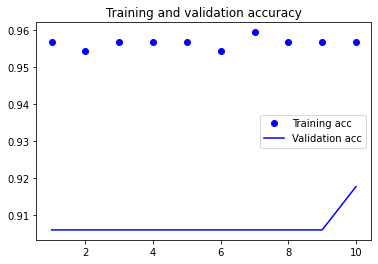

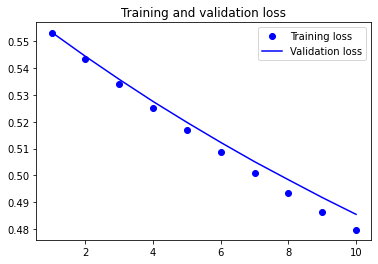

In [128]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [132]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_x)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average=None)

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9569620490074158
Val Accuracy:	 0.9176470637321472
Test Accuracy:	 0.037037037037037035
Precision:	 [1. 0. 0. 1.]
Recall:		 [0.03278689 0.         0.         0.1147541 ]
F1 Score:	 [0.06349206 0.         0.         0.20588235]
AUC:		 0.5184426229508197


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
